<a href="https://colab.research.google.com/github/nazmul-kaonine/Data-Science-Projects/blob/master/Handwritten%20Digit%20Classification%20using%20Multiple%20Descriptors%20%26%20ANN/LBP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Submitted by:
###Nazmul Kaonine
####PostGrad- UTS

#ALL LIBRARIES AND LOADER FUNCS

In [ ]:
import matplotlib.pyplot as plt
from skimage import feature 
from sklearn import svm
%matplotlib inline
import cv2
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import math, numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt
import h5py
import glob
from keras.preprocessing import image

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [ ]:
    os.system('wget -N http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz')
    os.system('wget -N http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz')
    os.system('wget -N http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz')
    os.system('wget -N http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz')

0

In [ ]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)     
                              


                        
        


    return images, labels

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
X_train, y_train = load_mnist('/content/gdrive/My Drive/DLA2/', kind='train')
X_test, y_test = load_mnist('/content/gdrive/My Drive/DLA2/', kind='t10k')

labelNames = ["0", "1", "2", "3", "4",
	"5", "6", "7", "8", "9"]

#Visualizations

In [ ]:
sns.countplot(y_train)
plt.show()
#shows digit label counts

In [ ]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [ ]:
def display_image(position):
    image = X_train[position].squeeze()
    plt.title('Example %d. Label: %d' % (position, y_train[position]))
    plt.imshow(image, cmap=plt.cm.gray_r)

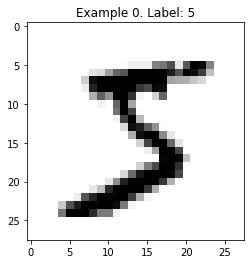

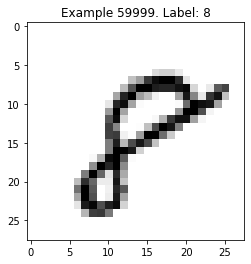

In [ ]:
display_image(0)
plt.show()
display_image(59999)

In [ ]:
X_train.shape


(60000, 784)

#LBP with SVM, KNN and ANN

#LBP SVM

In [ ]:
X_train=X_train.reshape(-1,28,28)
X_test=X_test.reshape(-1,28,28)

# print the size of the result reshaped train and test data splits

print("Train dataset after reshaping:{}".format(np.shape(X_train)))
print("Test dataset after reshaping :{}".format(np.shape(X_test)))

Train dataset after reshaping:(60000, 28, 28)
Test dataset after reshaping :(10000, 28, 28)


In [ ]:
 #LBP Class to compute histograms
class LocalBinaryPatterns:
	def __init__(self, numPoints, radius):
	
		self.numPoints = numPoints
		self.radius = radius
 
	def LBPfeatures(self, image, eps=1e-7):

		lbp = feature.local_binary_pattern(image, self.numPoints,
			self.radius, method="uniform")
   
		(hist, _) = np.histogram(lbp.ravel(),
			bins=np.arange(0, self.numPoints + 3),
			range=(0, self.numPoints + 2))
 
		hist = hist.astype("float")
		hist /= (hist.sum() + eps)

		return hist

In [ ]:
#Extracting features 
desc = LocalBinaryPatterns(24, 8)
data_train = []
labels_train = []


for img_index in range(len(X_train)):


	image = (X_train[img_index])
	hist = desc.LBPfeatures(image)
 
	
	labels_train.append(y_train[img_index])
	data_train.append(hist)

In [ ]:
#Sample 1
'''model = svm.SVC(kernel='linear',random_state=42) # rbf Kernel
model.fit(data_train, labels_train)
print(np.shape(X_train))
print(np.shape(y_train))

In [ ]:
# Sample 2 with Best Accuracy
model = svm.SVC(kernel='poly',C=100.0, gamma=0.1, degree=4,random_state=42) # poly Kernel
model.fit(data_train, labels_train)
print(np.shape(X_train))
print(np.shape(y_train))

In [ ]:
#Sample3
'''model = svm.SVC(kernel='rbf',C=100.0, random_state=42) # rbf Kernel
model.fit(data_train, labels_train)
print(np.shape(X_train))
print(np.shape(y_train))

(60000, 28, 28)
(60000,)


In [ ]:
print("Train set Accuracy: {:.2f}".format(model.score(data_train,labels_train)))

Train set Accuracy: 0.51


In [ ]:
#LBP Extraction For Test
predictions=[]
predict_label=[]

for im_index in range(len(X_test)):
  imag = X_test[im_index]

  histo = desc.LBPfeatures(imag)

  prediction = model.predict(histo.reshape(1, -1))

  predictions.append(prediction)
  predict_label.append(y_test[im_index])

In [ ]:
accuracy = metrics.accuracy_score(y_test, predictions)
print("Accuracy on test dataset:",accuracy)

Accuracy on test dataset: 0.5207


[[ 916    0   11    4    2   26    0    3    3   15]
 [   0 1091    3    0    3    1    1   29    7    0]
 [  21    1  501   86   48   72   50  144   88   21]
 [  32   17  152  274   92  112   36  130  105   60]
 [   7    3  103   23  383   23   46   70   67  257]
 [ 103    9   95   93   86  210   29  162   40   65]
 [  55   14  182   61   56   70  141  114  139  126]
 [  14   57   67   16   67   50   22  686   22   27]
 [  33    3   55   90   71   19   60   32  529   82]
 [  50   15   16   38  201   37   59   50   67  476]]


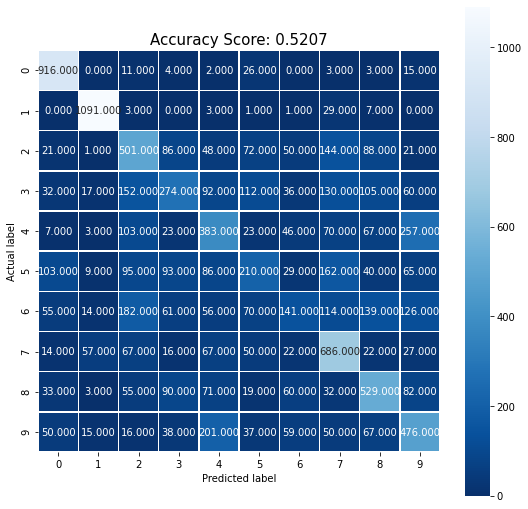

In [ ]:
# the confusion matrix
cm  = metrics.confusion_matrix(y_test, predictions)
print(cm)

# confusion matrix using seaborn library
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

In [ ]:
# Classification result on test samples
images = []
 
for i in np.random.choice(np.arange(0, len(y_test)), size=(16,)):
 
  histog = desc.LBPfeatures(X_test[i])
  prediction = model.predict(histog.reshape(1, -1))
  label = labelNames[prediction[0]]
  orig_label=labelNames[y_test[i]]
  image = X_test[i]
  color = (0, 255, 0)
  image = cv2.merge([image] * 3)
  image = cv2.resize(image, (96, 96), interpolation=cv2.INTER_LINEAR)
  cv2.putText(image, label, (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.50, color, 2)
  images.append(image)

In [ ]:
np.shape(images[1])

In [ ]:
## Display the classification results
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(images[1])
print(orig_label[:])
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(images[2])
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(images[3])
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(images[4])

#LBP KNN


In [ ]:
 #LBP Class to compute histograms
class LocalBinaryPatterns:
	def __init__(self, numPoints, radius):
	
		self.numPoints = numPoints
		self.radius = radius
 
	def LBPfeatures(self, image, eps=1e-7):

		lbp = feature.local_binary_pattern(image, self.numPoints,
			self.radius, method="uniform")
   
		(hist, _) = np.histogram(lbp.ravel(),
			bins=np.arange(0, self.numPoints + 3),
			range=(0, self.numPoints + 2))
 
		hist = hist.astype("float")
		hist /= (hist.sum() + eps)

		return hist

In [ ]:
X_train=X_train.reshape(-1,28,28)
X_test=X_test.reshape(-1,28,28)

# print the size of the result reshaped train and test data splits

print("Train dataset after reshaping:{}".format(np.shape(X_train)))
print("Test dataset after reshaping :{}".format(np.shape(X_test)))

Train dataset after reshaping:(60000, 28, 28)
Test dataset after reshaping :(10000, 28, 28)


In [ ]:
#Extracting features 
desc = LocalBinaryPatterns(24, 8)
data_train = []
labels_train = []


for img_index in range(len(X_train)):


	image = (X_train[img_index])
	hist = desc.LBPfeatures(image)
 
	
	labels_train.append(y_train[img_index])
	data_train.append(hist)

In [ ]:
#Sample 1
'''model=KNeighborsClassifier(n_neighbors=3)
model.fit(data_train,labels_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
#Sample 2 with best accuracy
model=KNeighborsClassifier(n_neighbors=3)
model.fit(data_train,labels_train)


In [ ]:
print("Train set Accuracy: {:.2f}".format(model.score(data_train,labels_train)))

Train set Accuracy: 0.65


In [ ]:

predictions=[]
predict_label=[]
# Exract LBP features for each test sample and classify it with the trained SVM classifier
for im_index in range(len(X_test)):
  imag = X_test[im_index]
  # Extract LBP feature
  histo = desc.LBPfeatures(imag)
  # Perform classification
  prediction = model.predict(histo.reshape(1, -1))
  # Store the classfication result
  predictions.append(prediction)
  predict_label.append(y_test[im_index])

In [ ]:
accuracy = metrics.accuracy_score(y_test, predictions)
print("Accuracy on test dataset:",accuracy)

Accuracy on test dataset: 0.4369


[[ 872    0   10   23    6   41    4    1    4   19]
 [   0 1097    7    4    0    3    2   18    4    0]
 [  44   13  519  142   77   46   41   81   58   11]
 [  49   12  243  311   88   98   66   50   63   30]
 [  21    8  167  130  352   54   41   24   49  136]
 [ 136   16  173  194   63  129   44   75   30   32]
 [  61   11  267  182   80   70   99   48   80   60]
 [  22   62  158  125   74   86   40  424   11   26]
 [  45    4  174  182   77   29   72   18  338   35]
 [  67   23   63  177  229   70   90   25   37  228]]


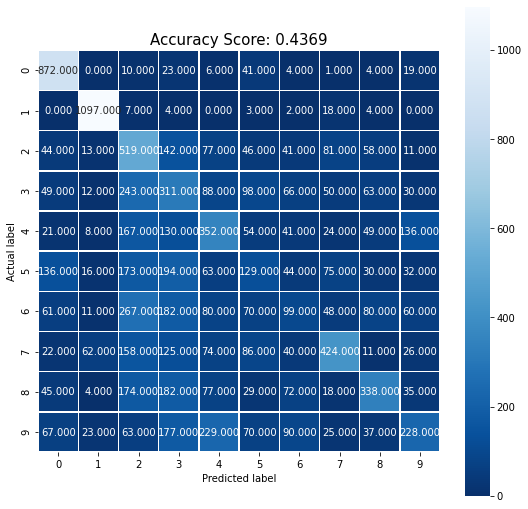

In [ ]:
# plot the confusion matrix
cm  = metrics.confusion_matrix(y_test, predictions)
print(cm)

# Plot confusion matrix using seaborn library
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

In [ ]:
# Display the some classification result on test samples
images = []
 
# randomly select a few testing fashion items
for i in np.random.choice(np.arange(0, len(y_test)), size=(16,)):
  # classify the clothing
  histog = desc.LBPfeatures(X_test[i])
  prediction = model.predict(histog.reshape(1, -1))
  label = labelNames[prediction[0]]
  orig_label=labelNames[y_test[i]]
  image = X_test[i]
  color = (0, 255, 0)
  image = cv2.merge([image] * 3)
  image = cv2.resize(image, (96, 96), interpolation=cv2.INTER_LINEAR)
  cv2.putText(image, label, (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.50, color, 2)
  images.append(image)

2


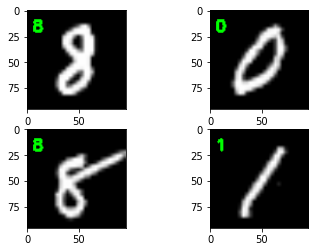

In [ ]:
## Display the classification results
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(images[1])
print(orig_label[:])
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(images[2])
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(images[3])
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(images[4])

#ANN LBP

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)
%load_ext tensorboard

Mnist=tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = Mnist.load_data()




2.2.0-rc3
2.3.0-tf
11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
#LBP Class to compute histograms

class LocalBinaryPatterns:
	def __init__(self, numPoints, radius):
		# store the number of points and radius
		self.numPoints = numPoints
		self.radius = radius
 
	def LBPfeatures(self, image, eps=1e-7):

		lbp = feature.local_binary_pattern(image, self.numPoints,
			self.radius, method="uniform")

		(hist, _) = np.histogram(lbp.ravel(),
			bins=np.arange(0, self.numPoints + 3),
			range=(0, self.numPoints + 2))
 
	
		hist = hist.astype("float")
		hist /= (hist.sum() + eps)
 
		return hist

In [ ]:
#Extracting features for training data
desc = LocalBinaryPatterns(26, 8)
data_train = []
labels_train = []



for img_index in range(len(train_images)):


	image = (train_images[img_index])
	hist = desc.LBPfeatures(image)
 
	
	labels_train.append(train_labels[img_index])
	data_train.append(hist)

In [ ]:
#Creating validation sets to test partial training data first
data_train = np.float32(data_train)
labels_train = np.float32(labels_train)

valid_images= data_train[:5000]
valid_labels = labels_train[:5000]


train_images  = data_train[5000:]
train_labels=labels_train[5000:]



In [ ]:
print(np.shape(train_images))
print(np.shape(train_labels))
print(np.shape(valid_images))
print(np.shape(valid_labels))



(55000, 28)
(55000,)
(5000, 28)
(5000,)


In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=[28]), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [ ]:
#Sample 1
#Best Accuracy
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

H=model.fit(train_images, train_labels, epochs=50,validation_data=(valid_images, valid_labels))

Epoch 1/5
1719/1719 [==============================] - 2s 1ms/step - loss: 2.0115 - accuracy: 0.2836 - val_loss: 1.7867 - val_accuracy: 0.3770
Epoch 2/5
1719/1719 [==============================] - 2s 1ms/step - loss: 1.7197 - accuracy: 0.4013 - val_loss: 1.6433 - val_accuracy: 0.4326
Epoch 3/5
1719/1719 [==============================] - 2s 1ms/step - loss: 1.6138 - accuracy: 0.4393 - val_loss: 1.5640 - val_accuracy: 0.4540
Epoch 4/5
1719/1719 [==============================] - 2s 1ms/step - loss: 1.5559 - accuracy: 0.4567 - val_loss: 1.5321 - val_accuracy: 0.4596
Epoch 5/5
1719/1719 [==============================] - 2s 1ms/step - loss: 1.5256 - accuracy: 0.4658 - val_loss: 1.5040 - val_accuracy: 0.4660


In [ ]:
#Testing SGD
#Sample Test 2
model1 = tf.keras.models.Sequential([tf.keras.layers.Flatten(data_format=None), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model1.compile(optimizer = tf.optimizers.SGD(0.01),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

H=model1.fit(train_images, train_labels, epochs=50,validation_data=(valid_images, valid_labels))


Epoch 1/50
1719/1719 [==============================] - 2s 1ms/step - loss: 2.2987 - accuracy: 0.1091 - val_loss: 2.2948 - val_accuracy: 0.1126
Epoch 2/50
1719/1719 [==============================] - 2s 1ms/step - loss: 2.2927 - accuracy: 0.1128 - val_loss: 2.2882 - val_accuracy: 0.1166
Epoch 3/50
1719/1719 [==============================] - 2s 1ms/step - loss: 2.2855 - accuracy: 0.1284 - val_loss: 2.2798 - val_accuracy: 0.1246
Epoch 4/50
1719/1719 [==============================] - 2s 1ms/step - loss: 2.2756 - accuracy: 0.1513 - val_loss: 2.2683 - val_accuracy: 0.1734
Epoch 5/50
1719/1719 [==============================] - 2s 1ms/step - loss: 2.2617 - accuracy: 0.1787 - val_loss: 2.2515 - val_accuracy: 0.1782
Epoch 6/50
1719/1719 [==============================] - 2s 1ms/step - loss: 2.2425 - accuracy: 0.1939 - val_loss: 2.2300 - val_accuracy: 0.1962
Epoch 7/50
1719/1719 [==============================] - 2s 1ms/step - loss: 2.2174 - accuracy: 0.2022 - val_loss: 2.2022 - val_accuracy:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 28)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               3712      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 5,002
Trainable params: 5,002
Non-trainable params: 0
_________________________________________________________________


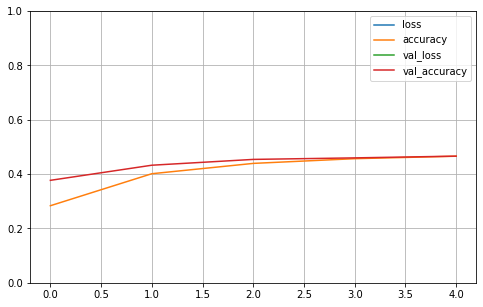

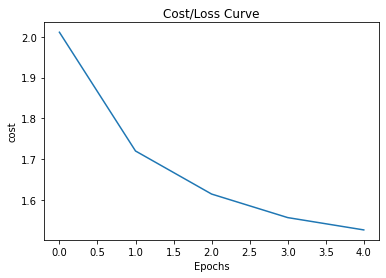

In [ ]:
#Cost/Loss Curves
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(H.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

plt.plot(H.history['loss'])
plt.ylabel('cost')
plt.xlabel('Epochs')
plt.title("Cost/Loss Curve")
plt.show()

In [ ]:
  # Extracting LBP features for testing

predictions=[]
predict_label=[]

for im_index in range(len(test_images)):
  imag = test_images[im_index]

  histo = desc.LBPfeatures(imag)

  prediction = model.predict(histo.reshape(1, -1))

  predictions.append(prediction)
  predict_label.append(test_labels[im_index])

In [ ]:
data_test = np.float32(data_test)
labels_test = np.float32(labels_test)
predict_label = np.float32(predict_label)

print(np.shape(data_test))
print(np.shape(labels_test))


(10000, 28)
(10000,)


In [ ]:
model.evaluate(data_test, predict_label)

313/313 [==============================] - 0s 1ms/step - loss: 1.4871 - accuracy: 0.4770


[1.4871478080749512, 0.47699999809265137]